In [ ]:
#CODSOFT TASK-03:IRIS FLOWER CLASSIFICATION

#NAME:VIDYASHREE V HIREMATH
#DOMAIN:DATA SCIENCE
#BATCH: P1
#GOAL:TO CLASSIFY THE IRIS FLOWER BASED ON THEIR MEASUREMENTS.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.

data = pd.read_csv('/content/IRIS.csv')

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(150, 5)

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data=data.drop_duplicates()

In [ ]:
feature=data.columns
feature

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
zero_val_cols=(data[feature]==0).sum()
zero_val_cols

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x= data['sepal_length']
y=data['sepal_width']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state =42)
def errors_product():
  prod = (x_train - x_train.mean()) * (y_train - y_train.mean())
  return prod

def squared_errors():
  sq_errors = (x_train - x_train.mean()) ** 2
  return sq_errors

# Calculate the slope and intercept values for the best fit line.
slope = errors_product().sum()/ squared_errors().sum()
intercept = y_train.mean() - slope * x_train.mean()

print(f"Slope: {slope} \nIntercept: {intercept}")

Slope: -0.009989713562272528 
Intercept: 3.063130374004326


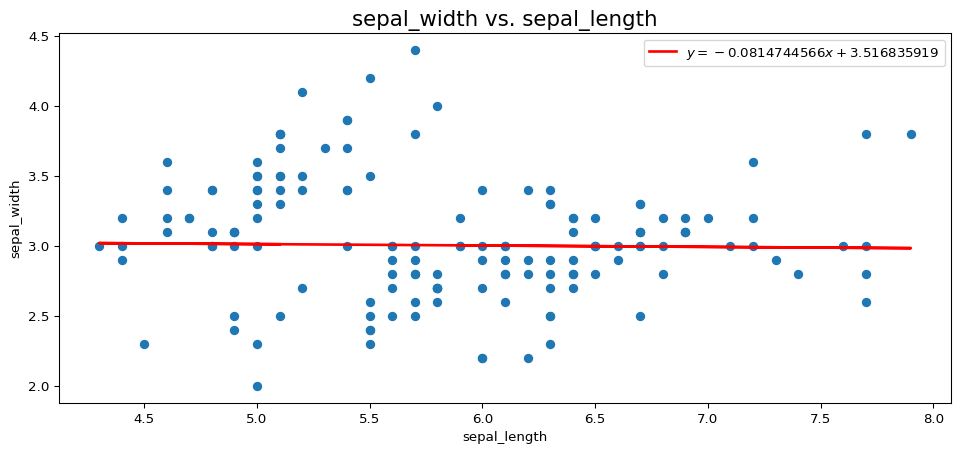

In [ ]:
plt.figure(figsize = (12, 5), dpi = 96)
plt.title("sepal_width vs. sepal_length", fontsize = 16)
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.plot(data['sepal_length'], slope * data['sepal_length'] + intercept, color = 'r',
         linewidth = 2, label = '$y = -0.0814744566x + 3.516835919$')
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()
plt.show()

In [ ]:
from re import X
# Deploy linear regression model using the 'sklearn.linear_model' module.
from sklearn.linear_model import LinearRegression

x_train_reshaped = x_train.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)
x_test_reshaped = x_test.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)


lin_reg = LinearRegression()
lin_reg.fit(x_train_reshaped, y_train_reshaped)

print("Coefficient of $x$ (or slope) ==>", lin_reg.coef_)
print("Intercept ==>", lin_reg.intercept_)

Coefficient of $x$ (or slope) ==> [[-0.00998971]]
Intercept ==> [3.06313037]


In [ ]:
# Deploy linear regression model using the 'sklearn.linear_model' module.
from sklearn.linear_model import LinearRegression

x_train_reshaped = x_train.values.reshape(-1, 1)
y_train_reshaped = y_train.values.reshape(-1, 1)
x_test_reshaped = x_test.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)


lin_reg = LinearRegression()
lin_reg.fit(x_train_reshaped, y_train_reshaped)

print("Coefficient of $x$ (or slope) ==>", lin_reg.coef_)
print("Intercept ==>", lin_reg.intercept_)

Coefficient of $x$ (or slope) ==> [[-0.00998971]]
Intercept ==> [3.06313037]
